In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
import math
from tensorflow.keras.utils import to_categorical

In [2]:
(X_dev, y_dev), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size=0.2)

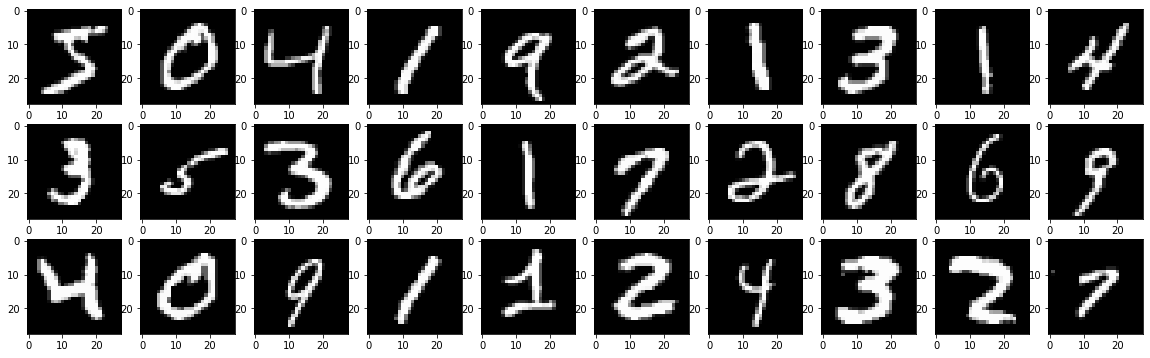

In [4]:
plt.figure(figsize=(20,6))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_dev[i], cmap="gray")
plt.savefig("mnist_multiple.png",dpi=100)

In [5]:
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_train,-1)))
X_val = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_val,-1)))
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_test,-1)))

In [6]:
X_train = tf.image.resize(X_train, [32,32])
X_val = tf.image.resize(X_val, [32,32])
X_test = tf.image.resize(X_test, [32,32])

#### LeNet:

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

C:\Users\Bjorn\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [9]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [10]:
history = model.fit(x=X_train,y=y_train, epochs=15, batch_size=64, validation_data=(X_val,y_val), shuffle=True
                   )

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - auc: 0.8336 - categorical_accuracy: 0.5005 - loss: 1.4045 - val_auc: 0.9931 - val_categorical_accuracy: 0.9144 - val_loss: 0.2959
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - auc: 0.9941 - categorical_accuracy: 0.9180 - loss: 0.2672 - val_auc: 0.9959 - val_categorical_accuracy: 0.9352 - val_loss: 0.2126
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - auc: 0.9967 - categorical_accuracy: 0.9412 - loss: 0.1868 - val_auc: 0.9977 - val_categorical_accuracy: 0.9543 - val_loss: 0.1491
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - auc: 0.9975 - categorical_accuracy: 0.9547 - loss: 0.1466 - val_auc: 0.9981 - val_categorical_accuracy: 0.9645 - val_loss: 0.1209
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.9982 - categorical_accuracy: 0.9633 - loss: 0.1201 - val_auc: 0.9988 - val_categorical_accuracy: 0.9716 - val_loss: 0.0895
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.9983 - 

In [11]:
y_test_hat = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


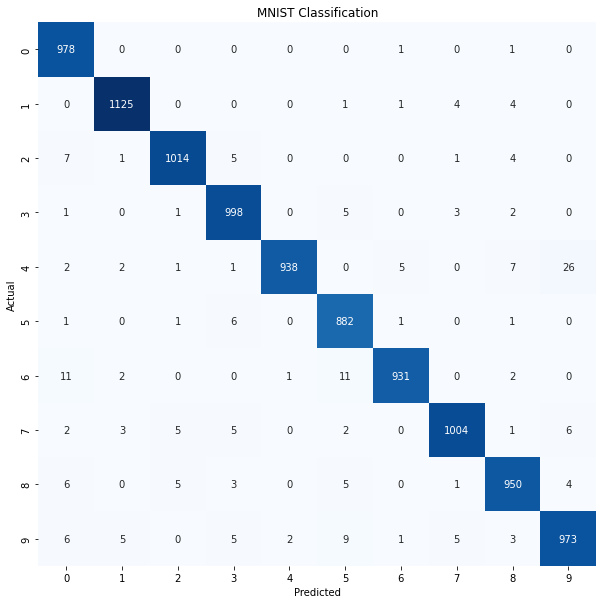

In [12]:
cm = confusion_matrix(y_test.argmax(axis=1), y_test_hat.argmax(axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MNIST Classification')
plt.show()

In [18]:
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

In [1]:
#num = 100
epsilon = 100
target_adv = np.zeros_like(y_test)
TARGET_CLASS = 5
target_adv[:,TARGET_CLASS] = 1
target_adv = target_adv.argmax(axis=1)
#target_adv = target_adv.argmax()

# Generate adversarial examples
adv_x_test = fast_gradient_method(model, X_test, epsilon, norm=np.inf, y=target_adv, targeted=True)

NameError: name 'np' is not defined

In [107]:
indx = 115

In [108]:
y_adv_test_indx = model.predict(np.expand_dims(adv_x_test[indx],0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [109]:
adv_x_test.shape

TensorShape([10000, 32, 32, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dette var et 4-tall
men er nå klassifisert som et 8-tall


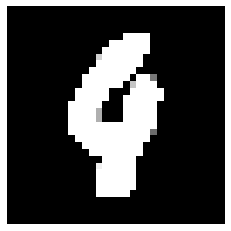

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


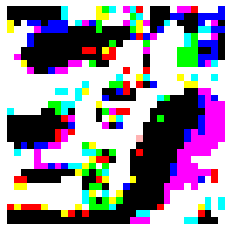

In [110]:
print(f"Dette var et {y_test[indx].argmax()}-tall")
print(f"men er nå klassifisert som et {y_adv_test_indx.argmax()}-tall")

plt.imshow(X_test[indx])
plt.axis("off")
plt.show()
plt.imshow(adv_x_test[indx])
plt.axis("off")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


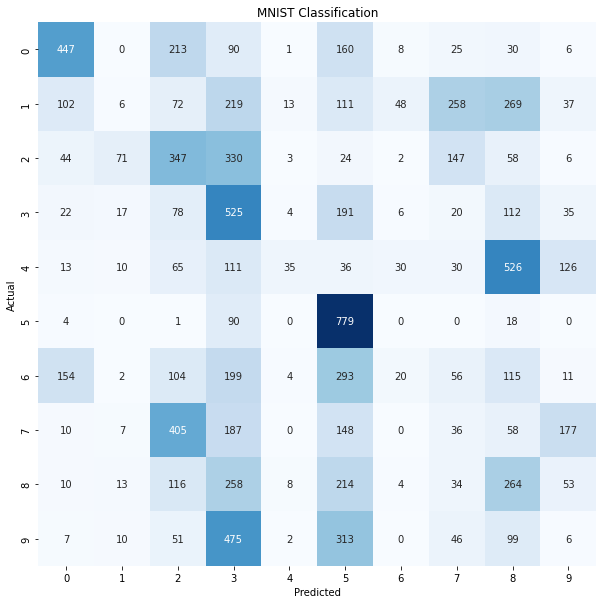

In [106]:
cm = confusion_matrix(y_test.argmax(axis=1), model.predict(adv_x_test).argmax(axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MNIST Classification')
plt.show()